# Machine Learning Review

Machine learnign blah blah blah

Data Cleaning - Day 1 activity 07 & 08

Supervised Learning - Uses labeled data

Unsupervised Learning - Uses unlabeled data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import os

## Machine Learning models

### 1) Linear Regression
Linear regression is a supervised learning algorithm that

In [2]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Weight coefficients:  [12.44002424]
y-axis intercept:  [12.44002424]


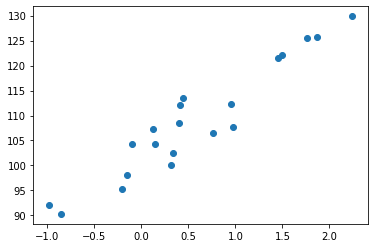

In [3]:
# Creating sample data 
from sklearn.datasets import make_regression
x, y = make_regression(n_samples=20, n_features=1, random_state=0, noise=4, bias=100.0)
plt.scatter(x, y)

# Training our model
model.fit(x, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.coef_) 

Our linear model now looks like this: 

In [4]:
print(f"y = {model.coef_}x + {model.coef_}")

y = [12.44002424]x + [12.44002424]


We can use our model to make predictions.

In [5]:
predictions = model.predict(x)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: 98.01970393090812
Predicted output: 100.01333771669648
Prediction Error: 1.9936337857883615


Sometimes, the real world just insists on being itself and laughing in the face of our pathetic attempts at quantifying phenomena with such crude directly proportional loser-tier filth.

Let's try looking at some Covid Data and applying regression in a higher order manner:

<module 'matplotlib.pyplot' from 'C:\\Users\\farad\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

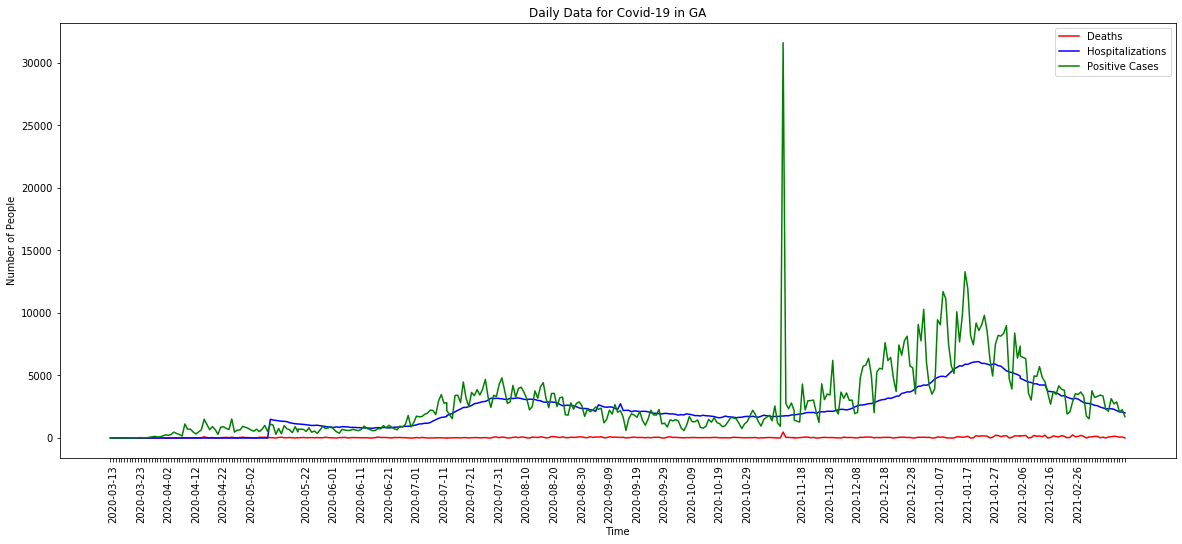

In [6]:
from CovidData import StateData
ga = StateData('GA')
ga.daily_chart()

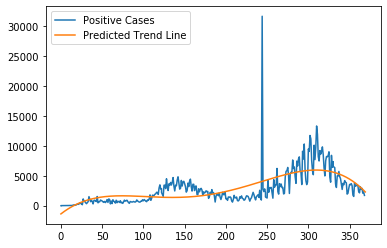

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# CONVERT LISTS TO NP ARRAYS
new_dates = [ga.dates.index(d) for d in ga.dates]
x = np.array(new_dates)
y = np.array(ga.cases)

# USE WEIRD MAGICAL FUNCTIONS TO FIT THE CASE DATA TO A SECORD ORDER POLYNOMIAL
poly_model = make_pipeline(PolynomialFeatures(4), LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, len(x), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.plot(x, y, label="Positive Cases")
plt.plot(xfit, yfit, label="Predicted Trend Line")
plt.legend(loc="best")

Considerations: 

### 2) Non-Linear Regression (Support Vector Regression)



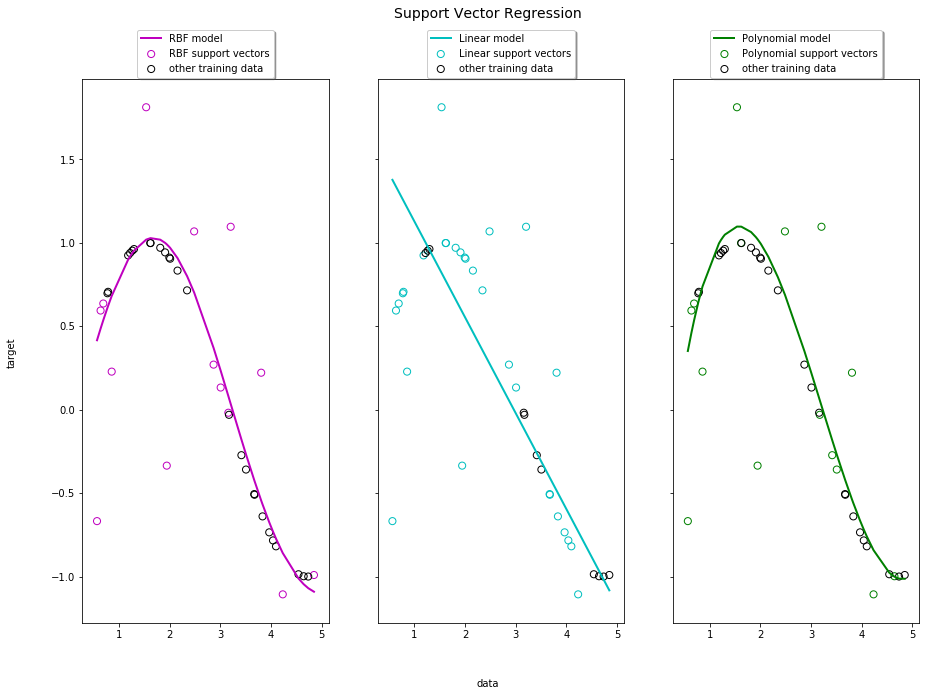

In [8]:
from sklearn.svm import SVR

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

Considerations: 

### 3) Logistic Regression
Logistic Regression is a statistical method for predicting binary outcomes from data. Examples of this are "yes" vs "no" or "young" vs "old". These are categories that translate to probability of being a 0 or a 1.

Consider how you would make sense of data that looked like the chart below:

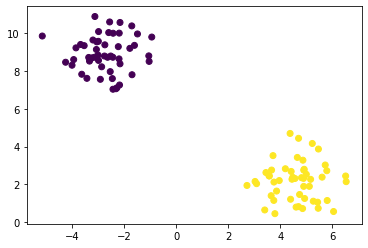

In [9]:
from sklearn.datasets import make_blobs
x, y = make_blobs(centers=2, random_state=42)
plt.scatter(x[:, 0], x[:, 1], c=y)

There is a clear pattern to the data, but it is far from one that can be modelled using linear OR non-linear regression. What we want to do here is to create a model that is capable of ***classifying*** data between the two groups. That is where logistic regression becomes useful.

In [10]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

classifier.fit(x_train, y_train)

C:\Users\farad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

\
\
\
Now that we have trained our model, new data that comes in can be classified with it.

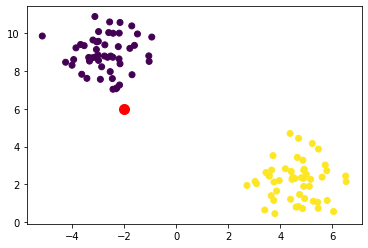

In [11]:
new_data = np.array([[-2, 6]])
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)

In [12]:
predictions = classifier.predict(new_data)
print("Classes are either 0 (purple) or 1 (yellow)")
print(f"The new point was classified as: {predictions}")

Classes are either 0 (purple) or 1 (yellow)
The new point was classified as: [0]


Considerations: 

### 4) Random Forest
Yo it be like trees but then again like a lot of them

![randomforest](https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png)

In [13]:
df = pd.read_csv(os.path.join("Resources", "diabetes.csv"))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
target = df["Outcome"]
data = df.drop("Outcome", axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

0.78125


In [16]:
new_person = pd.DataFrame([{
    "Pregnancies": 0,
    "Glucose": 137,
    "BloodPressure": 70,
    "SkinThickness": 27,
    "Insulin": 54,
    "BMI": 29.5,
    "DiabetesPedigreeFunction": 0.167,
    "Age": 35
}])
print(rf.predict(new_person))

[0]


### 5) K Nearest Neighbors
Can be supervised or unsupervised

**Supervised Use:**\
KNN can be used to classify data points if trained with labeled data

In [17]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

# Transform the training data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_train_scaled

array([[ 1.50755225, -1.01521454, -0.40451932, ..., -1.22070104,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.09964691, -0.61509602, ...,  0.13719053,
        -0.62493647, -0.88246592],
       [-1.12204091, -0.95207195,  0.54307587, ...,  0.0240329 ,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.85735805, -0.24658679, ..., -0.9440935 ,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.14149973,  0.2272108 , ..., -0.26514771,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46863645,  0.64836422, ..., -4.04964181,
         0.51627505,  2.953134  ]])

In [18]:
# Train our model with the scaled data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)

# Make a prediction
new_person_scaled = X_scaler.transform(new_person)
print(knn.predict(new_person_scaled))

[0]


**Unsupervised Use:**\
KNN can be used to predict similar kinds of data if trained with unlabeled data

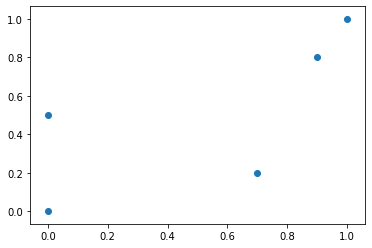

In [19]:
samples = [[0, 0], [0, 0.5], [1, 1], [0.7, 0.2], [0.9, 0.8]]
x = [s[0] for s in samples]
y = [s[1] for s in samples]
plt.scatter(x, y)

In [20]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(samples)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                 radius=1.0)

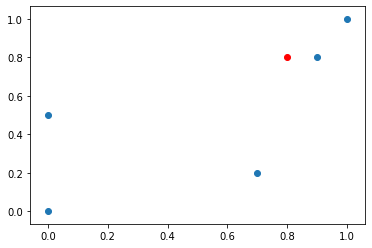

In [21]:
new_data = [[0.8,0.8]]
plt.scatter(x, y)
plt.scatter(new_data[0][0], new_data[0][1], c='r')

In [22]:
closest_neighbor = neigh.kneighbors(new_data)
print(closest_neighbor)
print(f"Nearest neighbor: {samples[closest_neighbor[1][0][0]]}")
print(f"Distance to nearest neighbor: {closest_neighbor[0]}")

(array([[0.1]]), array([[4]], dtype=int64))
Nearest neighbor: [0.9, 0.8]
Distance to nearest neighbor: [[0.1]]


Considerations:

### 6) Support Vector Classification

In [23]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Making a prediction:

In [24]:
model.predict(new_person)

array([0], dtype=int64)

### 7) K Means Clustering

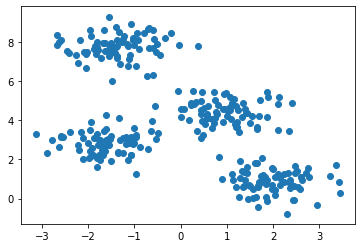

In [25]:
# Generate 4 clusters of random data.
from sklearn.datasets.samples_generator import make_blobs
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(data[:, 0], data[:, 1])

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [144]:
predicted_clusters = kmeans.predict(data)
set(predicted_clusters)

clusters = kmeans.predict(data)

cluster_dict = {}

for cluster_name in set(clusters):
    cluster_indexes = []
    for i, point in enumerate(clusters):
        if point == 3:
            cluster_indexes.append(i)
    cluster = data[cluster_indexes]
#     print(cluster_name)
#     print(cluster)

    cluster_dict[cluster_name] =list(cluster)

cluster_df = pd.DataFrame(cluster_dict)
cluster_df

,0,1,2,3
0,"[1.1552129830701285, 5.0996188654606085]","[1.1552129830701285, 5.0996188654606085]","[1.1552129830701285, 5.0996188654606085]","[1.1552129830701285, 5.0996188654606085]"
1,"[1.4137244158530171, 4.381177073902836]","[1.4137244158530171, 4.381177073902836]","[1.4137244158530171, 4.381177073902836]","[1.4137244158530171, 4.381177073902836]"
2,"[1.2425880181937505, 4.50399192387295]","[1.2425880181937505, 4.50399192387295]","[1.2425880181937505, 4.50399192387295]","[1.2425880181937505, 4.50399192387295]"
3,"[0.45379178903736606, 3.956477528589741]","[0.45379178903736606, 3.956477528589741]","[0.45379178903736606, 3.956477528589741]","[0.45379178903736606, 3.956477528589741]"
4,"[1.0692385339646449, 4.530684839209695]","[1.0692385339646449, 4.530684839209695]","[1.0692385339646449, 4.530684839209695]","[1.0692385339646449, 4.530684839209695]"
...,...,...,...,...
70,"[2.3381228529390596, 3.431167922689131]","[2.3381228529390596, 3.431167922689131]","[2.3381228529390596, 3.431167922689131]","[2.3381228529390596, 3.431167922689131]"
71,"[2.096805454802437, 4.847414122413621]","[2.096805454802437, 4.847414122413621]","[2.096805454802437, 4.847414122413621]","[2.096805454802437, 4.847414122413621]"
72,"[1.6599104892724754, 3.5628918352361985]","[1.6599104892724754, 3.5628918352361985]","[1.6599104892724754, 3.5628918352361985]","[1.6599104892724754, 3.5628918352361985]"
73,"[0.9171985638912357, 3.9057003556311254]","[0.9171985638912357, 3.9057003556311254]","[0.9171985638912357, 3.9057003556311254]","[0.9171985638912357, 3.9057003556311254]"


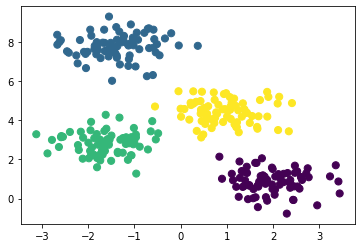

In [28]:
plt.scatter(data[:, 0], data[:, 1], c=predicted_clusters, s=50, cmap='viridis')

[3]


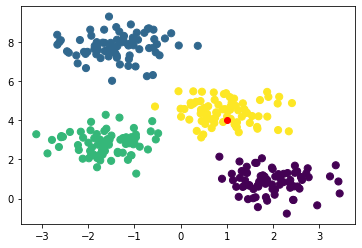

In [124]:
new_data = [[1, 4]]
print(kmeans.predict(new_data))
plt.scatter(data[:, 0], data[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.scatter(new_data[0][0], new_data[0][1], c='r')

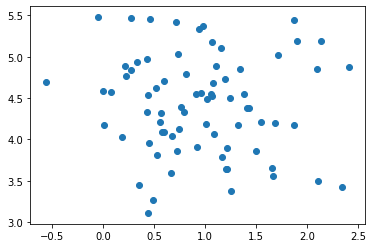

In [133]:
threes = []
for i, point in enumerate(predicted_clusters):
    if point == 3:
        threes.append(i)

yellow = data[threes]
x = [i[0] for i in yellow]
y = [i[1] for i in yellow]

plt.scatter(x,y)

### 8) Neural Networks

In [61]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from tensorflow.keras.utils import to_categorical

# Scaling our data
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
new_person_scaled = X_scaler.transform(new_person)

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

Training the model

In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create model and add layers
model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=len(X_train.columns)))
model.add(Dense(units=4))
model.add(Dense(units=2, activation='softmax'))

# Compile and fit the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=0
)

model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

192/192 - 0s - loss: 0.4724 - acc: 0.7656
Normal Neural Network - Loss: 0.4723913272221883, Accuracy: 0.765625


In [119]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: [1 0 0 1 0]
Actual Labels: [1, 0, 0, 1, 0]


In [120]:
new_person_prediction = model.predict_classes(new_person_scaled)

print(new_person_prediction)
print(label_encoder.inverse_transform(new_person_prediction))

[1]
[1]


## Consider a duck:
![pickingMLalgorithm](Resources//Picking_ML_Algorithm.png)

In [47]:
X_test_scaled

array([[-0.82986389,  2.4576282 ,  0.33249916, ...,  1.34420526,
         2.78665365, -0.96584853],
       [-0.53768687, -0.44693118,  0.2272108 , ...,  0.17490974,
        -0.19434743, -0.88246592],
       [ 0.04666716, -1.42564141, -0.40451932, ...,  0.22520202,
        -0.23349189, -0.71570071],
       ...,
       [-0.82986389, -0.38378859, -0.50980767, ..., -0.85608201,
         1.4406865 , -1.04923114],
       [-0.24550986,  0.21606607,  0.43778751, ..., -1.39672402,
        -0.60385869,  1.7857775 ],
       [ 0.33884418, -1.04678584,  0.43778751, ..., -0.57947447,
        -0.63396981,  0.28489057]])